# Pandas Excercise Fin&Hel data sciences jobs analysis

In [2]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df["job_country"].value_counts().head(20)
df["job_country"].isin(["Finland"]).any()

np.True_

In [4]:
fin_jobs = df[(df["job_country"] == "Finland") | (df["job_country"] == "Sweden")]
fin_jobs = fin_jobs[fin_jobs["salary_year_avg"].notna()]
fin_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
2125,Business Analyst,Business Analyst to support Channel Engagement...,Sweden,via Ai-Jobs.net,Full-time,False,Sweden,2023-12-29 13:16:44,False,False,Sweden,year,43200.0,NaN,Nordea,['qlik'],{'analyst_tools': ['qlik']}
8965,Data Scientist,"Data Scientist, Marketing Analytics","Stockholm, Sweden",via Ai-Jobs.net,Full-time,False,Sweden,2023-02-14 13:35:13,False,False,Sweden,year,157500.0,NaN,Dun & Bradstreet,"['r', 'python', 'julia', 'redshift', 'databric...","{'analyst_tools': ['tableau', 'power bi'], 'cl..."
11617,Data Scientist,Data Scientist to Retail Space Planning & Anal...,"Stockholm, Sweden",via Ai-Jobs.net,Full-time,False,Sweden,2023-02-11 13:21:38,False,False,Sweden,year,157500.0,NaN,H&M Group,"['r', 'python', 'sql', 'gdpr']","{'libraries': ['gdpr'], 'programming': ['r', '..."
15699,Senior Data Analyst,Senior Business Data Analyst - BA HEAT,"Stockholm, Sweden",via Ai-Jobs.net,Full-time,False,Sweden,2023-01-25 14:08:43,False,False,Sweden,year,49566.5,NaN,Vattenfall,['azure'],{'cloud': ['azure']}
22635,Data Engineer,Data Engineer [Game Intelligence],"Malmö, Sweden",via Ai-Jobs.net,Full-time,False,Sweden,2023-07-03 13:26:00,False,False,Sweden,year,134241.0,NaN,Ubisoft,"['assembly', 'python', 'sql', 'airflow', 'gdpr...","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747113,Data Engineer,IT & Strategy Talent Programme - Junior Data E...,"Solna, Sweden",via Ai-Jobs.net,Full-time,False,Sweden,2023-01-12 21:09:29,False,False,Sweden,year,98301.5,NaN,Vattenfall,"['sql', 'python', 'azure']","{'cloud': ['azure'], 'programming': ['sql', 'p..."
751441,Machine Learning Engineer,Senior ML Engineer,"Helsinki, Finland",via Ai-Jobs.net,Full-time,False,Finland,2023-04-03 20:41:40,False,False,Finland,year,185500.0,NaN,DoubleVerify,"['python', 'databricks', 'snowflake', 'bigquer...","{'cloud': ['databricks', 'snowflake', 'bigquer..."
761700,Data Engineer,"Director, Area Lead Engineer Data Engineering","Stockholm, Sweden",via Ai-Jobs.net,Full-time,False,Sweden,2023-02-21 21:29:03,True,False,Sweden,year,249000.0,NaN,H&M Group,"['python', 'bash', 'azure', 'spark']","{'cloud': ['azure'], 'libraries': ['spark'], '..."
768071,Data Engineer,Data Engineer,"Stockholm, Sweden",via Ai-Jobs.net,Full-time,False,Sweden,2023-05-16 02:17:31,True,False,Sweden,year,133500.0,NaN,Trustly,"['sql', 'gcp', 'bigquery', 'aws', 'airflow']","{'cloud': ['gcp', 'bigquery', 'aws'], 'librari..."


In [5]:
fin_jobs.groupby("job_title_short")["salary_year_avg"].agg(['median','max','min','count']).sort_values(by='median',ascending=False)

,median,max,min,count
job_title_short,,,,
Senior Data Scientist,157500.0,192000.0,88128.0,5
Senior Data Engineer,147500.0,147500.0,96773.0,8
Machine Learning Engineer,141000.0,185500.0,80850.0,7
Data Scientist,132500.0,157500.0,80850.0,11
Software Engineer,115750.0,156500.0,75000.0,2
Senior Data Analyst,111175.0,111202.0,49566.5,6
Data Analyst,105650.0,165000.0,45000.0,14
Data Engineer,98301.5,249000.0,60000.0,13
Business Analyst,89100.0,123500.0,43200.0,7


Matplotlib practice

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df["job_posted_date"])

In [29]:
job_salary = df.groupby('job_title_short')['salary_year_avg'].median().sort_values()

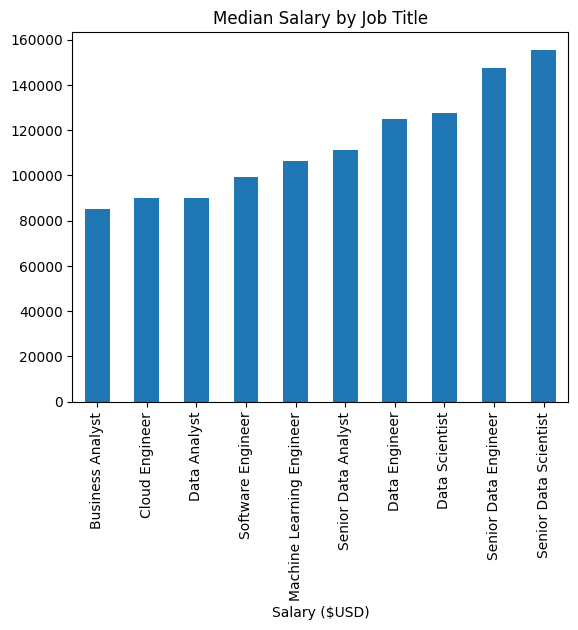

In [31]:
job_salary.plot(kind='bar')
plt.xlabel('Salary ($USD)')
plt.ylabel('')
plt.title('Median Salary by Job Title')
plt.show()